# Step 1: Dataset Overview And Selection

## Romania Weather 2011 - 2021

About Dataset

This dataset contains multiple .csv files which describe weather conditions in all of the counties from Romania, Europe during 2011-2021.

Each filename follows the template weather_YEAR_COUNTY.csv, and contains daily data on multiple metrics, most of them being aggregated among 24 measurements of each day by using the average mean.

There is also an unique file weather_2011-2021_Romania.csv that contains all of the data from the other files merged together.

The data has been collected from the public Visual Crossing Weather API using a small Node.js script.

You can find more documentation regarding the data's structure at the following link:

https://www.visualcrossing.com/resources/documentation/weather-data/weather-data-documentation/

## Step 2: Load Libraries 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

## Step 3: Load the Dataset

In [70]:
df = pd.read_csv('./data/weather_2011-2021_Romania.csv', encoding='latin1')

In [71]:
df.head()

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,"Alba Iulia, Romania",01/01/2011,-10.1,-3.6,-6.9,-8.2,90.62,NaN,8.9,21.6,...,4.8,71.6,1022.3,Mist,46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",NaN,Partially cloudy
1,"Alba Iulia, Romania",01/02/2011,-9.0,-1.7,-4.6,-6.0,89.80,NaN,8.8,14.4,...,6.5,74.1,1017.9,"Mist, Light Snow, Fog",46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",NaN,Partially cloudy
2,"Alba Iulia, Romania",01/03/2011,-7.2,-1.8,-4.0,-5.0,93.01,NaN,8.7,7.2,...,4.3,94.5,1021.1,"Mist, Light Snow, Fog, Snow",46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",NaN,Overcast
3,"Alba Iulia, Romania",01/04/2011,-6.7,-4.5,-5.7,-7.4,87.73,NaN,7.0,14.4,...,7.4,96.6,1026.5,"Mist, Light Snow, Sky Coverage Increasing, Snow",46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",NaN,Overcast
4,"Alba Iulia, Romania",01/05/2011,-11.5,-5.0,-7.9,-10.2,83.54,NaN,8.0,15.1,...,8.1,61.1,1027.9,Mist,46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",NaN,Partially cloudy


## Step 4: Exploratory Data Analysis

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164738 entries, 0 to 164737
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Address              164738 non-null  object 
 1   Date time            164738 non-null  object 
 2   Minimum Temperature  164732 non-null  float64
 3   Maximum Temperature  164732 non-null  float64
 4   Temperature          164732 non-null  float64
 5   Dew Point            164731 non-null  float64
 6   Relative Humidity    164731 non-null  float64
 7   Heat Index           34034 non-null   float64
 8   Wind Speed           164727 non-null  float64
 9   Wind Gust            137077 non-null  float64
 10  Wind Direction       164729 non-null  float64
 11  Wind Chill           96851 non-null   float64
 12  Precipitation        164738 non-null  float64
 13  Precipitation Cover  164732 non-null  float64
 14  Snow Depth           103204 non-null  float64
 15  Visibility       

In [73]:
df.describe()

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Latitude,Longitude,Info
count,164732.000000,164732.000000,164732.000000,164731.000000,164731.000000,34034.000000,164727.000000,137077.000000,164729.000000,96851.000000,164738.000000,164732.000000,103204.000000,164731.000000,164732.000000,150369.000000,164738.000000,164738.000000,0.0
mean,6.316744,16.340800,11.078846,5.850921,74.179035,30.026947,17.122877,30.656394,189.806620,-1.742129,1.777438,9.950880,12.391318,11.081152,47.658121,1017.291742,45.753329,25.177725,NaN
std,8.340559,10.660078,9.280912,7.672297,14.153643,2.663363,9.540903,15.178451,66.710893,7.033037,6.857540,16.806223,60.420047,5.388005,29.123139,7.531101,1.127608,2.039753,NaN
min,-29.100000,-21.500000,-23.700000,-42.800000,3.050000,25.800000,0.000000,0.000000,7.710000,-44.700000,0.000000,0.000000,0.000000,0.000000,0.000000,939.400000,43.914700,21.223300,NaN
25%,0.100000,7.700000,3.800000,0.200000,63.780000,27.900000,10.800000,21.600000,142.460000,-5.500000,0.000000,0.000000,0.000000,9.000000,22.900000,1012.300000,44.926900,23.580500,NaN
50%,6.500000,17.000000,11.300000,6.200000,74.750000,29.500000,14.500000,28.800000,191.830000,-1.100000,0.000000,0.000000,0.000000,10.000000,46.800000,1016.600000,45.696000,25.456900,NaN
75%,13.300000,25.400000,19.000000,12.200000,85.560000,31.700000,21.000000,38.700000,239.380000,3.600000,0.580000,12.500000,5.990000,12.200000,71.700000,1022.000000,46.638500,26.817400,NaN
max,27.300000,42.100000,32.400000,23.700000,100.000000,88.000000,187.100000,230.400000,360.000000,9.800000,308.000000,100.000000,998.000000,222.900000,100.000000,1060.600000,47.793300,28.802330,NaN


In [74]:
df.columns

Index(['Address', 'Date time', 'Minimum Temperature', 'Maximum Temperature',
       'Temperature', 'Dew Point', 'Relative Humidity', 'Heat Index',
       'Wind Speed', 'Wind Gust', 'Wind Direction', 'Wind Chill',
       'Precipitation', 'Precipitation Cover', 'Snow Depth', 'Visibility',
       'Cloud Cover', 'Sea Level Pressure', 'Weather Type', 'Latitude',
       'Longitude', 'Resolved Address', 'Name', 'Info', 'Conditions'],
      dtype='object')

In [75]:
df.shape

(164738, 25)

In [76]:
## Check and remove missing values
df.isnull().sum()

Address                     0
Date time                   0
Minimum Temperature         6
Maximum Temperature         6
Temperature                 6
Dew Point                   7
Relative Humidity           7
Heat Index             130704
Wind Speed                 11
Wind Gust               27661
Wind Direction              9
Wind Chill              67887
Precipitation               0
Precipitation Cover         6
Snow Depth              61534
Visibility                  7
Cloud Cover                 6
Sea Level Pressure      14369
Weather Type            30976
Latitude                    0
Longitude                   0
Resolved Address            0
Name                        0
Info                   164738
Conditions                  6
dtype: int64

In [77]:
numeric_feature_list = ['Temperature', 'Relative Humidity',
'Heat Index', 'Wind Speed', 'Precipitation Cover', 'Snow Depth',
'Visibility', 'Cloud Cover', 'Sea Level Pressure']

object_feature_list = ['Weather Type', 'Conditions']

## impute missing values based on column type
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy = 'mean')
obj_imputer     = SimpleImputer(strategy = 'most_frequent')

df[numeric_feature_list] = numeric_imputer.fit_transform(df[numeric_feature_list])
df[object_feature_list]  = obj_imputer.fit_transform(df[object_feature_list])

In [78]:
## drop Info column
df = df.drop('Info', axis = 1)

In [79]:
df.columns

Index(['Address', 'Date time', 'Minimum Temperature', 'Maximum Temperature',
       'Temperature', 'Dew Point', 'Relative Humidity', 'Heat Index',
       'Wind Speed', 'Wind Gust', 'Wind Direction', 'Wind Chill',
       'Precipitation', 'Precipitation Cover', 'Snow Depth', 'Visibility',
       'Cloud Cover', 'Sea Level Pressure', 'Weather Type', 'Latitude',
       'Longitude', 'Resolved Address', 'Name', 'Conditions'],
      dtype='object')

In [80]:
df.isnull().sum()

Address                    0
Date time                  0
Minimum Temperature        6
Maximum Temperature        6
Temperature                0
Dew Point                  7
Relative Humidity          0
Heat Index                 0
Wind Speed                 0
Wind Gust              27661
Wind Direction             9
Wind Chill             67887
Precipitation              0
Precipitation Cover        0
Snow Depth                 0
Visibility                 0
Cloud Cover                0
Sea Level Pressure         0
Weather Type               0
Latitude                   0
Longitude                  0
Resolved Address           0
Name                       0
Conditions                 0
dtype: int64

In [81]:
df.head()

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Conditions
0,"Alba Iulia, Romania",01/01/2011,-10.1,-3.6,-6.9,-8.2,90.62,30.026947,8.9,21.6,...,3.32,4.8,71.6,1022.3,Mist,46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",Partially cloudy
1,"Alba Iulia, Romania",01/02/2011,-9.0,-1.7,-4.6,-6.0,89.80,30.026947,8.8,14.4,...,2.76,6.5,74.1,1017.9,"Mist, Light Snow, Fog",46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",Partially cloudy
2,"Alba Iulia, Romania",01/03/2011,-7.2,-1.8,-4.0,-5.0,93.01,30.026947,8.7,7.2,...,3.12,4.3,94.5,1021.1,"Mist, Light Snow, Fog, Snow",46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",Overcast
3,"Alba Iulia, Romania",01/04/2011,-6.7,-4.5,-5.7,-7.4,87.73,30.026947,7.0,14.4,...,3.12,7.4,96.6,1026.5,"Mist, Light Snow, Sky Coverage Increasing, Snow",46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",Overcast
4,"Alba Iulia, Romania",01/05/2011,-11.5,-5.0,-7.9,-10.2,83.54,30.026947,8.0,15.1,...,3.12,8.1,61.1,1027.9,Mist,46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",Partially cloudy


## Step 5: Feature Engineering

In [ ]:
## for name feature keep only the county name
counties   = df['Name'].str.split(',').str[0]
df['Name'] = counties

## get all county names
print(df['Name'].unique())

['Alba Iulia' 'Arad' 'Pite<U+0219>ti' 'Bacau' 'Oradea' 'Bistri<U+021B>a'
 'Boto<U+0219>ani' 'Braila' 'Bra<U+0219>ov' 'Bucure<U+0219>ti' 'Buzau'
 'Calara<U+0219>i' 'Re<U+0219>i<U+021B>a' 'Cluj-Napoca' 'Constan<U+021B>a'
 'Sfântu Gheorghe' 'Târgovi<U+0219>te' 'Craiova' 'Gala<U+021B>i' 'Giurgiu'
 'Târgu Jiu' 'Miercurea Ciuc' 'Deva' 'Slobozia' 'Ia<U+0219>i' 'Baia Mare'
 'Drobeta-Turnu Severin' 'Târgu Mure<U+0219>' 'Piatra Neam<U+021B>'
 'Slatina' 'Ploie<U+0219>ti' 'Zalau' 'Satu Mare' 'Sibiu' 'Suceava'
 'Alexandria' 'Timi<U+0219>oara' 'Tulcea' 'Râmnicu Vâlcea' 'Vaslui'
 'Foc<U+0219>ani' 'Bihor']


In [ ]:
df.head()

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Conditions
0,"Alba Iulia, Romania",01/01/2011,-10.1,-3.6,-6.9,-8.2,90.62,30.026947,8.9,21.6,...,3.32,4.8,71.6,1022.3,Mist,46.0709,23.5805,"Alba Iulia, România",Alba Iulia,Partially cloudy
1,"Alba Iulia, Romania",01/02/2011,-9.0,-1.7,-4.6,-6.0,89.80,30.026947,8.8,14.4,...,2.76,6.5,74.1,1017.9,"Mist, Light Snow, Fog",46.0709,23.5805,"Alba Iulia, România",Alba Iulia,Partially cloudy
2,"Alba Iulia, Romania",01/03/2011,-7.2,-1.8,-4.0,-5.0,93.01,30.026947,8.7,7.2,...,3.12,4.3,94.5,1021.1,"Mist, Light Snow, Fog, Snow",46.0709,23.5805,"Alba Iulia, România",Alba Iulia,Overcast
3,"Alba Iulia, Romania",01/04/2011,-6.7,-4.5,-5.7,-7.4,87.73,30.026947,7.0,14.4,...,3.12,7.4,96.6,1026.5,"Mist, Light Snow, Sky Coverage Increasing, Snow",46.0709,23.5805,"Alba Iulia, România",Alba Iulia,Overcast
4,"Alba Iulia, Romania",01/05/2011,-11.5,-5.0,-7.9,-10.2,83.54,30.026947,8.0,15.1,...,3.12,8.1,61.1,1027.9,Mist,46.0709,23.5805,"Alba Iulia, România",Alba Iulia,Partially cloudy


In [106]:
## encode conditions feature
df['Conditions']        = pd.Categorical(df['Conditions'])
df['Conditions_Labels'] = df['Conditions'].cat.codes

print(df['Conditions'].unique())

## encode county feature
df['Name']        = pd.Categorical(df['Name'])
df['Name_Labels'] = df['Name'].cat.codes

numeric_feature_list.append('Name_Labels')

['Partially cloudy', 'Overcast', 'Clear', 'Rain, Overcast', 'Rain, Partially cloudy', 'Rain']
Categories (6, object): ['Clear', 'Overcast', 'Partially cloudy', 'Rain', 'Rain, Overcast', 'Rain, Partially cloudy']


In [85]:
## check correlation matrix
corr_matrix = df.corr(numeric_only = True)

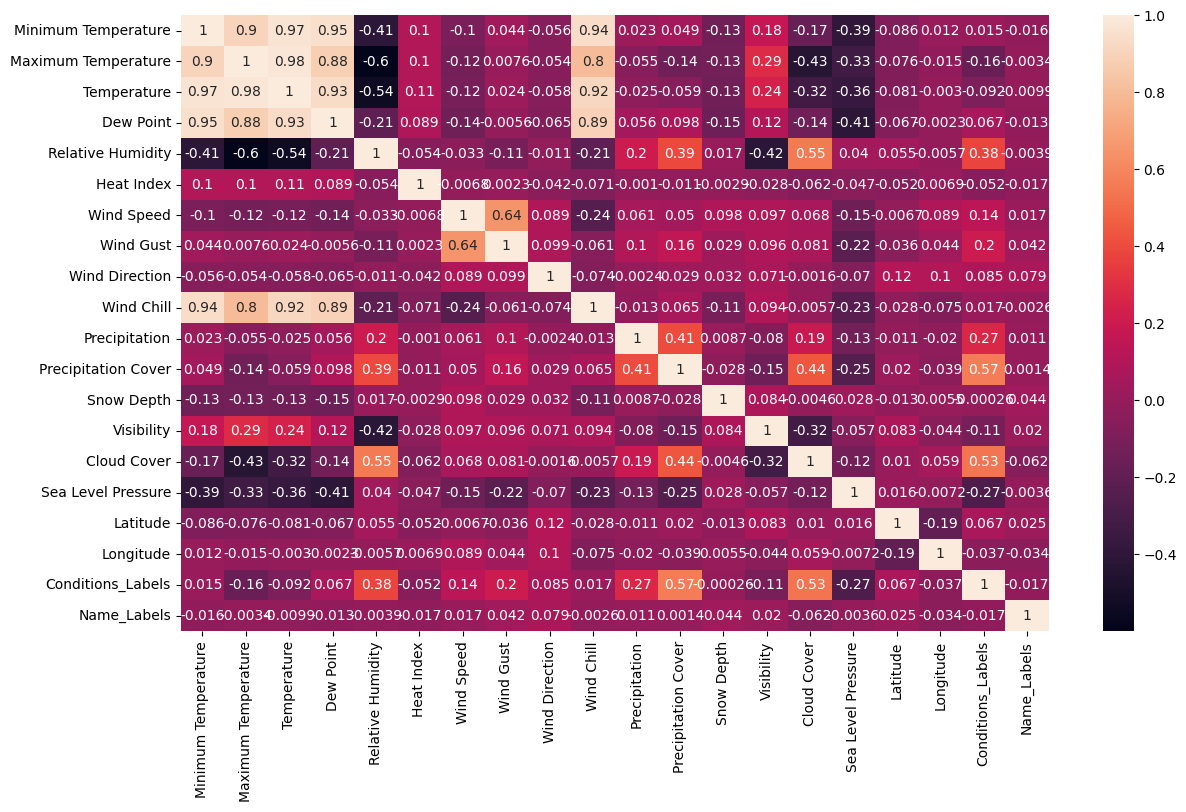

In [86]:
## create visualization of correlation
plt.figure(figsize = (14, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [87]:
## select the features
print(numeric_feature_list)

X = df[numeric_feature_list]
y = df['Conditions_Labels']

['Temperature', 'Relative Humidity', 'Heat Index', 'Wind Speed', 'Precipitation Cover', 'Snow Depth', 'Visibility', 'Cloud Cover', 'Sea Level Pressure', 'Name_Labels']


## Step 6: Train Model

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [89]:
## Standardize features
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled  = min_max_scaler.transform(X_test)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto')
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [91]:
y_pred = classifier.predict(X_test_scaled)

df_predictions = pd.DataFrame({
    'Actual': y_test,
    'Predictions': y_pred,
})

df_predictions

,Actual,Predictions
154866,5,2
76073,4,4
12896,5,5
34749,4,1
91538,2,0
...,...,...
8793,1,1
75092,0,0
152958,4,4
111917,5,5


## Step 7: Evaluate Model

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [93]:
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[7621    0  177  412    0   17]
 [   0 2065   93    0  383    7]
 [ 124   78 8658   19   21 1164]
 [  60    0    2  795    0   31]
 [   0  268   14    0 4364  189]
 [   6   10  616   69  103 5582]]
0.8827546436809518
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      8227
           1       0.85      0.81      0.83      2548
           2       0.91      0.86      0.88     10064
           3       0.61      0.90      0.73       888
           4       0.90      0.90      0.90      4835
           5       0.80      0.87      0.83      6386

    accuracy                           0.88     32948
   macro avg       0.84      0.88      0.85     32948
weighted avg       0.89      0.88      0.88     32948



## Step 8: Optimize the Model 

In [94]:
param_grid = {'n_neighbors': range(1, 10)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10)})

In [95]:
best_k = grid_search.best_params_['n_neighbors']

In [96]:
classifier = KNeighborsClassifier(n_neighbors = best_k)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[7637    0  166  446    0   25]
 [   0 2059   67    0  375    7]
 [ 127   88 8727   22   22 1240]
 [  42    0    2  760    0   29]
 [   0  267   13    0 4393  148]
 [   5    7  585   67   81 5541]]
0.8837258710695641
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8274
           1       0.85      0.82      0.84      2508
           2       0.91      0.85      0.88     10226
           3       0.59      0.91      0.71       833
           4       0.90      0.91      0.91      4821
           5       0.79      0.88      0.83      6286

    accuracy                           0.88     32948
   macro avg       0.84      0.88      0.85     32948
weighted avg       0.89      0.88      0.89     32948



In [97]:
best_k

9

In [98]:
X_test_scaled[0], y_test[0]

(array([0.43783784, 0.81838302, 0.06795734, 0.08925708, 0.0417    ,
        0.02204409, 0.0453118 , 0.692     , 0.72607261, 0.31707317]),
 np.int8(2))

In [107]:
new_data_point = np.array([
    [0.54128, 0.741258, 0.63259, 0.0055, 0.01111, 0.63258, 0.0005585 , 0.785, 0.957, 0.582]
])

predicted = classifier.predict(new_data_point)
predicted

array([1], dtype=int8)

## Step 9: Export the Model

In [101]:
import joblib

# Save the model
joblib.dump(classifier, 'weather_knn_model.joblib')

# Save the scaler
joblib.dump(min_max_scaler, 'weather_scaler.joblib')

['weather_scaler.joblib']